In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml("Bank_marketing_data_set_UCI", return_X_y= True)

In [4]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [5]:
y[:5]

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [6]:
y.value_counts(normalize=True).round(2)

y
no     0.88
yes    0.12
Name: proportion, dtype: float64

In [7]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [9]:
def summary(df):
   tf=pd.DataFrame({'데이터 종류':df.dtypes,
                    '빈값':df.isnull().sum(),
                    '특별갯수':df.nunique(),
                    '많이 노온': [list(df[col].unique()[0:12]) for col in df.columns]}
                    ) 
   return tf

In [10]:
summary(X)

,데이터 종류,빈값,특별갯수,많이 노온
age,int64,0,77,"[58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57]"
job,object,0,12,"[management, technician, entrepreneur, blue-co..."
marital,object,0,3,"[married, single, divorced]"
education,object,0,4,"[tertiary, secondary, unknown, primary]"
default,object,0,2,"[no, yes]"
balance,int64,0,7168,"[2143, 29, 2, 1506, 1, 231, 447, 121, 593, 270..."
housing,object,0,2,"[yes, no]"
loan,object,0,2,"[no, yes]"
contact,object,0,3,"[unknown, cellular, telephone]"
day,int64,0,31,"[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 19, 20]"


In [11]:
def plotting_features(data):
    cols = data.columns
 
    nrows= int(np.ceil(len(cols)/2))
    fig, ax = plt.subplots(
                        nrows=nrows, 
                        ncols=2, 
                        figsize=(15,30),   
                        constrained_layout=True)
    ax = ax.ravel()
 
    for i in range(len(cols)):
        if (data[cols[i]].dtypes == 'number'):
                sns.countplot(y = data[cols[i]], ax=ax[i])
                ax[i].set_title(f'{cols[i]} count')
 
        else:
            sns.histplot(x = data[cols[i]], ax=ax[i])
            ax[i].set_title(f'{cols[i]} distribution');


In [12]:
X.shape

(45211, 16)

In [13]:
obj=X.select_dtypes(include=[object])

In [14]:
obj[:3]

,job,marital,education,default,housing,loan,contact,month,poutcome
0,management,married,tertiary,no,yes,no,unknown,may,unknown
1,technician,single,secondary,no,yes,no,unknown,may,unknown
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown


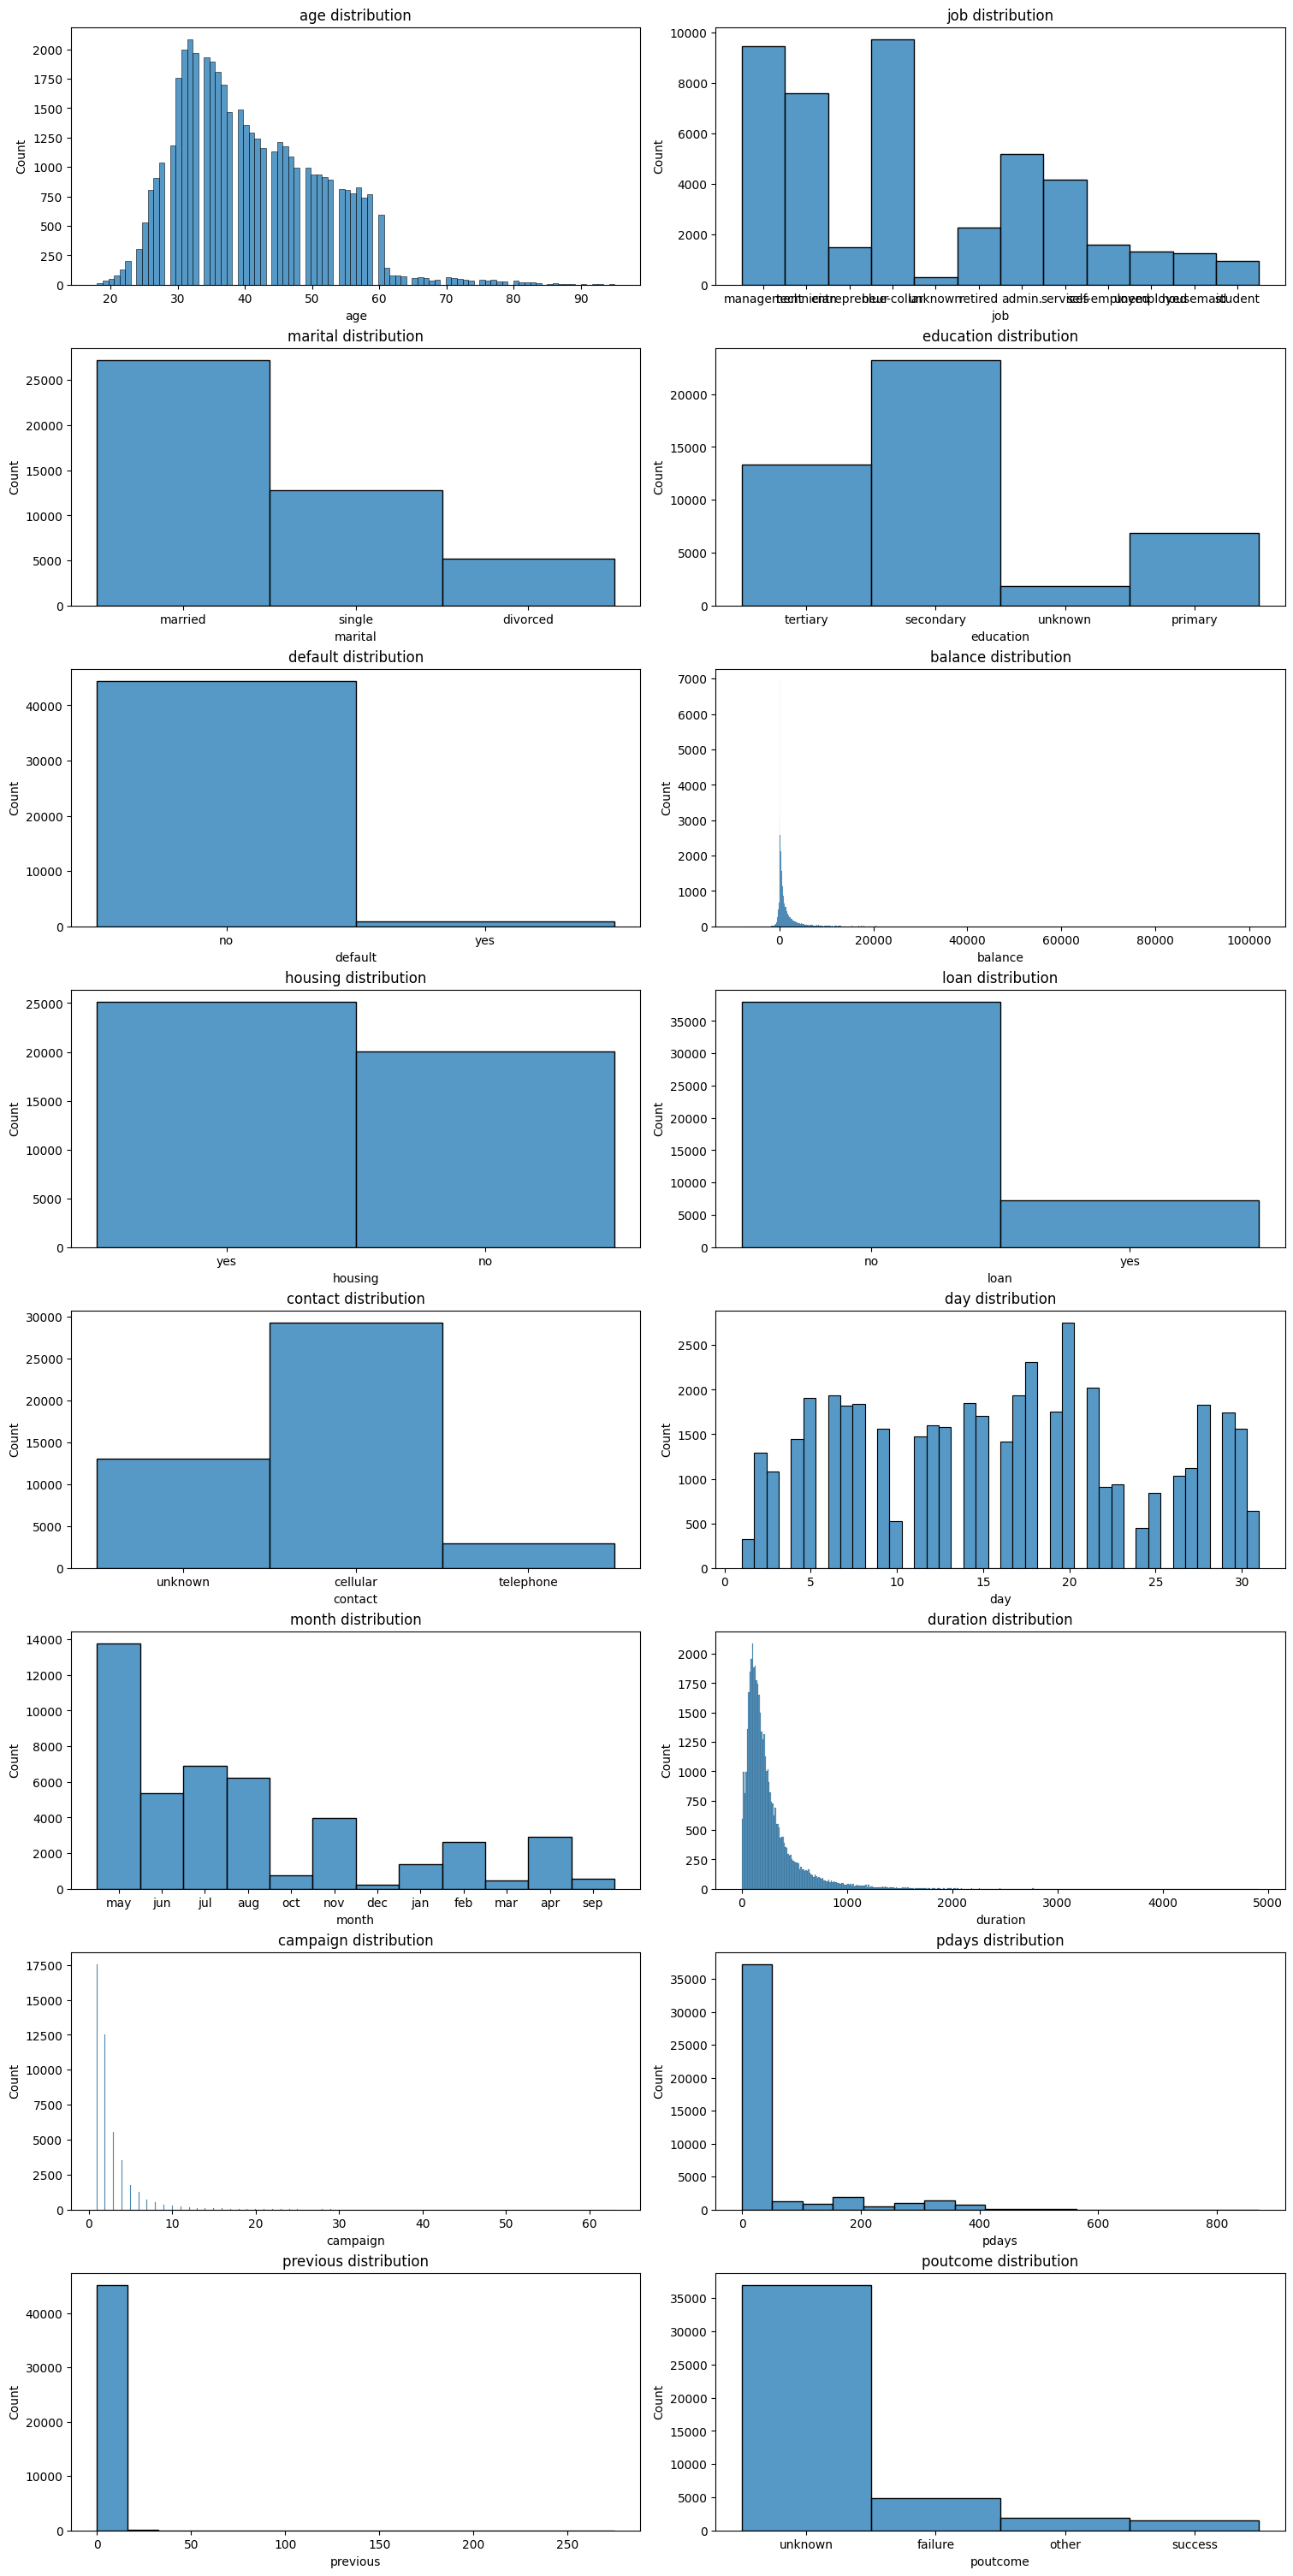

In [15]:
plotting_features(X)

(<Figure size 1500x1000 with 1 Axes>, <Axes: >)

<Axes: xlabel='job', ylabel='count'>

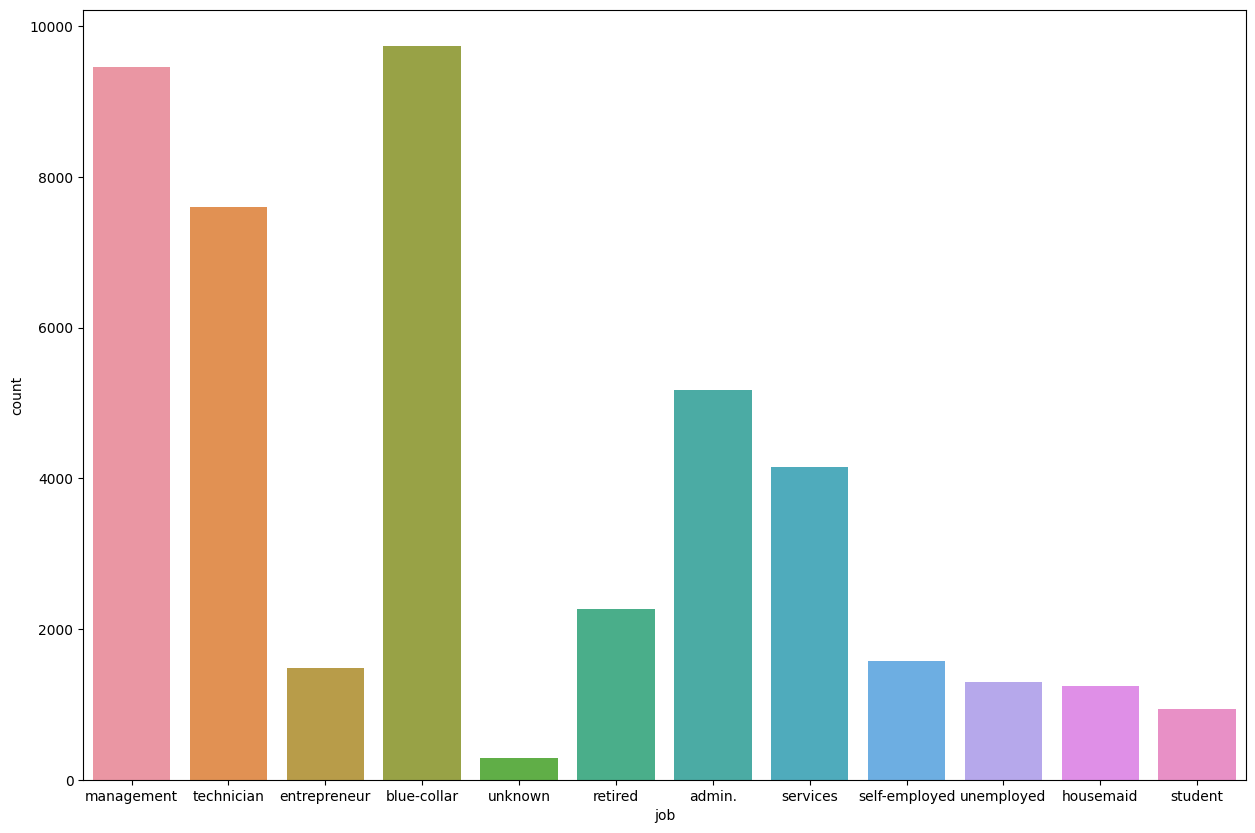

In [16]:
plt.subplots(figsize=(15,10))
sns.countplot(x='job',data=X)

In [17]:
#불필요한 열 찾기
#poutcome[unknown 넘 많음], default(credit 있는지 없는지)[거의 다 'no'라고] , month

In [18]:
X_dr=X.drop(['poutcome','default','day','month'],axis=1)

In [19]:
X_dr

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,pdays,previous
0,58,management,married,tertiary,2143,yes,no,unknown,261,1,-1,0
1,44,technician,single,secondary,29,yes,no,unknown,151,1,-1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,76,1,-1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,92,1,-1,0
4,33,unknown,single,unknown,1,no,no,unknown,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,977,3,-1,0
45207,71,retired,divorced,primary,1729,no,no,cellular,456,2,-1,0
45208,72,retired,married,secondary,5715,no,no,cellular,1127,5,184,3
45209,57,blue-collar,married,secondary,668,no,no,telephone,508,4,-1,0


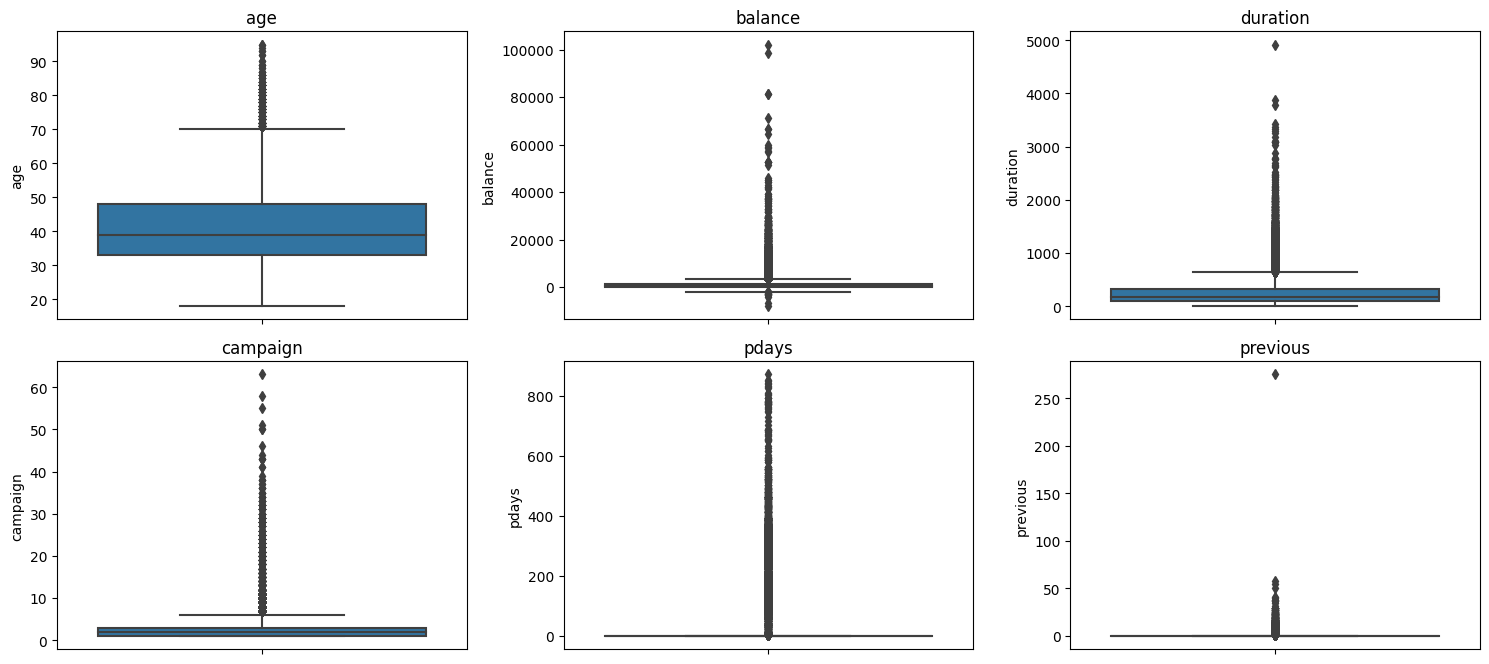

In [20]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_dr.select_dtypes(include=np.number), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=X_dr[col])
    plt.title(col)
plt.tight_layout()
plt.show();

In [21]:
#Balance 이상치 IQR 
q1=X_dr.balance.quantile(.25)
q3=X_dr.balance.quantile(.75)
iqr=q3-q1
X_dr.balance=X_dr.balance.clip(lower=q1 - 1.5 * iqr, upper=q3 + 1.5 * iqr)

In [22]:
#campaign and previous (only %1  is outlier)
X_dr['campaign'] = X_dr['campaign'].clip(upper=X_dr['campaign'].quantile(0.99))
X_dr['previous'] = X_dr['previous'].clip(upper=X_dr['previous'].quantile(0.99))


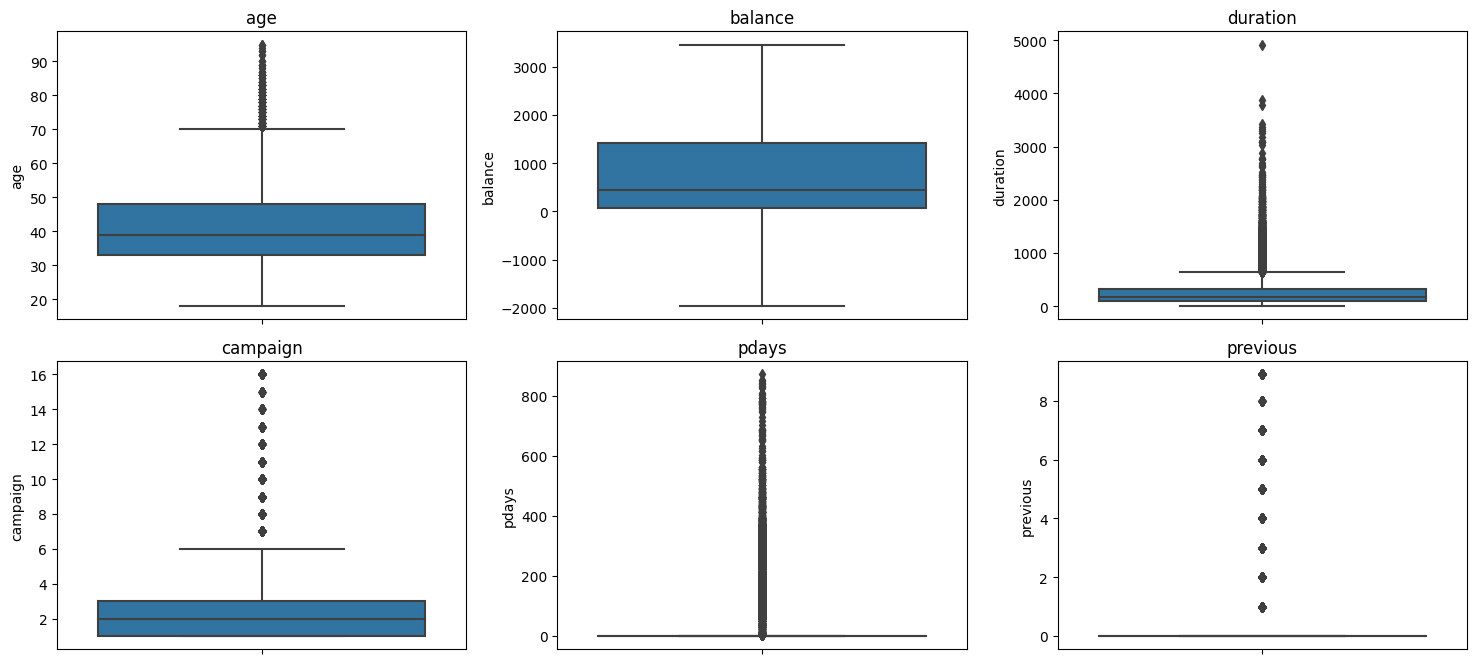

In [23]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(X_dr.select_dtypes(include=np.number), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=X_dr[col])
    plt.title(col)
plt.tight_layout()
plt.show();

In [24]:
X_dumy= pd.get_dummies(X_dr)

In [25]:
X_dumy

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,2143,261,1,-1,0.0,False,False,False,False,...,False,True,False,False,True,True,False,False,False,True
1,44,29,151,1,-1,0.0,False,False,False,False,...,True,False,False,False,True,True,False,False,False,True
2,33,2,76,1,-1,0.0,False,False,True,False,...,True,False,False,False,True,False,True,False,False,True
3,47,1506,92,1,-1,0.0,False,True,False,False,...,False,False,True,False,True,True,False,False,False,True
4,33,1,198,1,-1,0.0,False,False,False,False,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0.0,False,False,False,False,...,False,True,False,True,False,True,False,True,False,False
45207,71,1729,456,2,-1,0.0,False,False,False,False,...,False,False,False,True,False,True,False,True,False,False
45208,72,3462,1127,5,184,3.0,False,False,False,False,...,True,False,False,True,False,True,False,True,False,False
45209,57,668,508,4,-1,0.0,False,True,False,False,...,True,False,False,True,False,True,False,False,True,False


In [26]:
X_dumy=X_dumy.replace(True,1)
X_dumy=X_dumy.replace(False,0)

In [27]:
y=y.replace('no',0) 
y=y.replace('yes',1)

In [28]:
X_dumy

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,58,2143,261,1,-1,0.0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,44,29,151,1,-1,0.0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
2,33,2,76,1,-1,0.0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
3,47,1506,92,1,-1,0.0,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
4,33,1,198,1,-1,0.0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0.0,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
45207,71,1729,456,2,-1,0.0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
45208,72,3462,1127,5,184,3.0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
45209,57,668,508,4,-1,0.0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [29]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
X_dumy[numerical_features] = scaler.fit_transform(X_dumy[numerical_features])

X_dumy

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,education_secondary,education_tertiary,education_unknown,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown
0,1.606965,1.027653,0.011016,-0.654134,-0.411453,-0.359918,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
1,0.288529,-0.768817,-0.416127,-0.654134,-0.411453,-0.359918,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1
2,-0.747384,-0.791761,-0.707361,-0.654134,-0.411453,-0.359918,0,0,1,0,...,1,0,0,0,1,0,1,0,0,1
3,0.571051,0.486333,-0.645231,-0.654134,-0.411453,-0.359918,0,1,0,0,...,0,0,1,0,1,1,0,0,0,1
4,-0.747384,-0.792611,-0.233620,-0.654134,-0.411453,-0.359918,0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.092379,2.791329,0.119347,-0.411453,-0.359918,0,0,0,0,...,0,1,0,1,0,1,0,1,0,0
45207,2.831227,0.675837,0.768224,-0.267394,-0.411453,-0.359918,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
45208,2.925401,2.148534,3.373797,0.892829,1.436189,1.697977,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
45209,1.512791,-0.225797,0.970146,0.506088,-0.411453,-0.359918,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0


### Class Weight Control

              precision    recall  f1-score   support

          No       0.91      0.97      0.94      9950
         Yes       0.60      0.29      0.39      1353

    accuracy                           0.89     11303
   macro avg       0.76      0.63      0.66     11303
weighted avg       0.87      0.89      0.87     11303



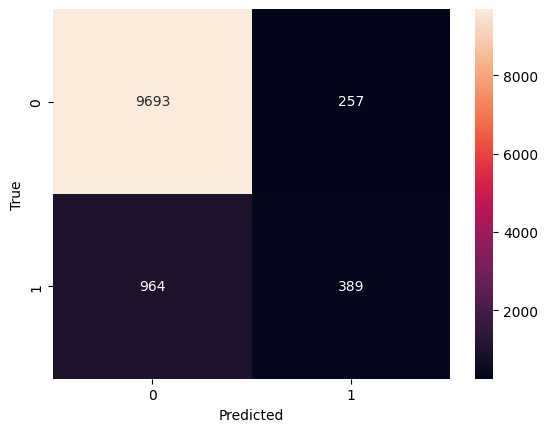

In [30]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
model=RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_dumy, y, random_state=42)
# Calculate class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

# You can pass this dictionary to the model (if it supports it)
# Example with RandomForest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred,target_names=['No','Yes']))
recall_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True');

### Undersampling

              precision    recall  f1-score   support

          No       1.00      0.82      0.90      9950
         Yes       0.43      1.00      0.61      1353

    accuracy                           0.84     11303
   macro avg       0.72      0.91      0.75     11303
weighted avg       0.93      0.84      0.87     11303



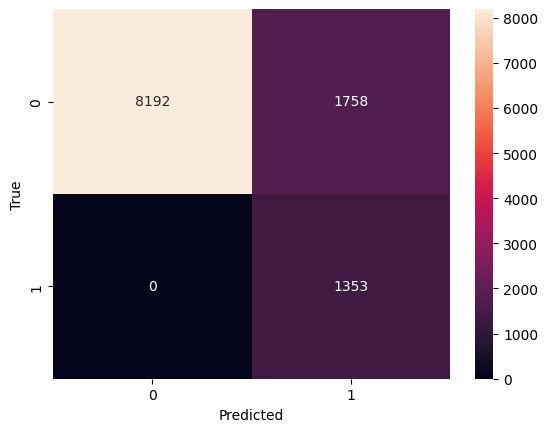

In [31]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

import numpy as np

train_data=pd.concat([X_dumy,y],axis=1)

majority_class = train_data[train_data.y == 0]
minority_class = train_data[train_data.y == 1]

# Downsample majority class
majority_class_downsampled = majority_class.sample(n=len(minority_class), random_state=42)

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([minority_class, majority_class_downsampled])

# Separate features and target
X_train_resampled = downsampled_data.drop('y', axis=1)
y_train_resampled = downsampled_data['y']

# Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
# Predict on the test set
y_pred = model.predict(X_test)


print(classification_report(y_test,y_pred,target_names=['No','Yes']))
recall_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True');

              precision    recall  f1-score   support

          No       0.92      0.97      0.94      9950
         Yes       0.59      0.34      0.43      1353

    accuracy                           0.89     11303
   macro avg       0.75      0.65      0.69     11303
weighted avg       0.88      0.89      0.88     11303



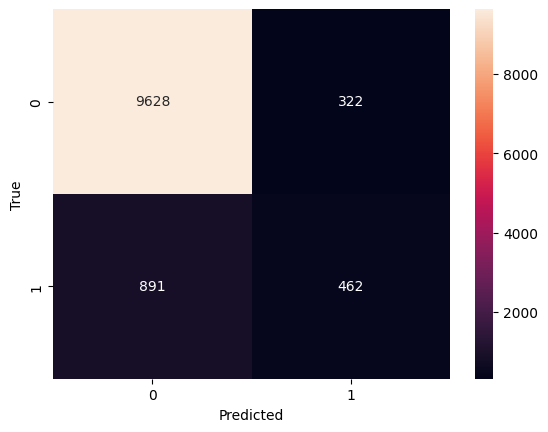

In [32]:
# Tuning 안 하고 ML 확인 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
model=RandomForestClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_dumy, y, random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['No','Yes']))
recall_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True');

In [33]:
#pozitif olanlarin gercekte de ne kadarinin pozitif oldugu presision 462/ 322+ 462
#gercek pozitiflerin ne kadarinin bildigimize recall 462 / 462 + 891 

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from scipy.stats import randint

In [35]:
rf = RandomForestClassifier()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_dumy, y, random_state=42)

In [37]:
param_distributions ={
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 50),
    'min_samples_split': randint(2, 50),
    'min_samples_leaf': randint(1, 50),
    'max_features': randint(1,10),
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes':randint(10,100)
}

# now create a searchCV object and fit it to the data
search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_distributions,
                                   n_iter=50,
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1
                                   )

search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002609B9E75D0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000260A17C55D0>,
                                        'max_...ject at 0x00000260A16F2E50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000260A17D65D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000260A34ACE50>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000260A1823990>},
                   random_state=42, verbose=2)

In [38]:
pd.DataFrame(search.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
34,16.878517,0.523355,0.701458,0.068950,True,gini,28,9,98,23,32,397,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.894807,0.894984,0.899841,0.896544,0.002332,1
48,26.399893,0.513529,0.432852,0.042912,False,gini,18,9,63,3,41,785,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.894984,0.893568,0.898071,0.895541,0.001880,2
35,40.673534,0.920311,1.344099,0.040471,True,gini,16,9,69,49,3,996,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.893657,0.894010,0.898425,0.895364,0.002169,3
30,23.482690,0.182988,1.000697,0.058127,True,gini,38,8,78,34,7,610,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.894010,0.893657,0.896125,0.894597,0.001090,4
27,29.332383,0.128267,1.263619,0.148669,True,gini,49,8,90,49,3,741,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.892683,0.892683,0.897983,0.894450,0.002498,5
7,7.002935,0.084675,0.211769,0.008709,False,gini,44,8,56,35,15,180,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.894276,0.892949,0.894620,0.893948,0.000721,6
21,23.536376,1.285002,1.016613,0.111814,True,gini,36,7,68,22,29,677,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.894187,0.891622,0.894090,0.893300,0.001187,7
24,40.153105,0.328346,1.505971,0.096430,True,entropy,8,9,71,37,34,918,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.893303,0.892064,0.894443,0.893270,0.000972,8
14,15.328000,0.332872,0.617347,0.050547,True,gini,17,8,44,35,34,478,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.893126,0.892418,0.892939,0.892828,0.000300,9
10,31.691562,0.550389,1.233367,0.143330,False,gini,8,7,71,40,22,819,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.893480,0.891710,0.893028,0.892739,0.000751,10


In [39]:
search.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 28,
 'max_features': 9,
 'max_leaf_nodes': 98,
 'min_samples_leaf': 23,
 'min_samples_split': 32,
 'n_estimators': 397}

In [40]:
search.score(X_test, y_test)

0.892240997965142

In [41]:
y_pred_random=search.predict(X_test)
recall_score(y_test,y_pred_random)

0.2660753880266075

In [42]:
a=confusion_matrix(y_test, y_pred_random)
b=confusion_matrix(y_test, y_pred)
a,b
a-b

(array([[9725,  225],
        [ 993,  360]], dtype=int64),
 array([[9628,  322],
        [ 891,  462]], dtype=int64))

array([[  97,  -97],
       [ 102, -102]], dtype=int64)

In [43]:
search.best_score_

0.8965436857688566

In [44]:
print(classification_report(y_test,y_pred_random,target_names=['No','Yes']))

              precision    recall  f1-score   support

          No       0.91      0.98      0.94      9950
         Yes       0.62      0.27      0.37      1353

    accuracy                           0.89     11303
   macro avg       0.76      0.62      0.66     11303
weighted avg       0.87      0.89      0.87     11303



# 월래 기본값들 default params와 하면 no recall= 0.97 yes recall = 0.34 튜닝 다음에 no recall 0.98 yes recall 0.27 로 됐습니다.

- https://github.com/FurkanBeyazit/mage-ai
- https://github.com/FurkanBeyazit/mage-ai/blob/main/data_loaders/bank_load.py
- https://github.com/FurkanBeyazit/mage-ai/blob/main/transformers/bank_transformer.py
- https://github.com/FurkanBeyazit/mage-ai/blob/main/custom/bank_ml.py